# Навигация

* [Загружаем датасеты](#1-bullet)
* [Проверяем пропуски](#2-bullet)
* [Посмотрим корреляцию параметров](#3-bullet)
* [Топ 10 стран с самым высоким уровнем счастья](#4-bullet)
* [Факторы, которые больше всего влияют на уровень счастья в отдельных странах](#5-bullet)
* [Рассчитаем неизвестные факторы и объединим таблицы](#6-bullet)
* [Построим уравнение линейной регрессии для предсказания уровня счастья ](#7-bullet)
* [Посмотрим как менялся уровень счастья в России](#8-bullet)
* [Вывод](#9-bullet)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression

%matplotlib inline

# Загружаем датасеты <a class="anchor" id="1-bullet"></a>

In [28]:
df_2018 = pd.read_csv('data-sets/2018.csv')
df_2019 = pd.read_csv('data-sets/2019.csv')

In [29]:
df_2018.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295
6,7,Canada,7.328,1.330,1.532,0.896,0.653,0.321,0.291
7,8,New Zealand,7.324,1.268,1.601,0.876,0.669,0.365,0.389
8,9,Sweden,7.314,1.355,1.501,0.913,0.659,0.285,0.383
9,10,Australia,7.272,1.340,1.573,0.910,0.647,0.361,0.302


In [30]:
df_2019.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


# Проверяем пропуски <a class="anchor" id="2-bullet"></a>

In [31]:
df_2018.isna().sum() # имеется пропуск

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [32]:
df_2019.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [33]:
df_2018 = df_2018.fillna(df_2018[~df_2018['Perceptions of corruption'].isna()]['Perceptions of corruption'].mean())
df_2018.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

# Посмотрим корреляцию параметров <a class="anchor" id="3-bullet"></a>

Видно, что положительно коррелируют с уровенем счастья (Score) больше всего:
* ВВП на душу населения (GDP per capita)
* социальная поддержка (Social support)
* свобода выбора (Freedom to make life choices)

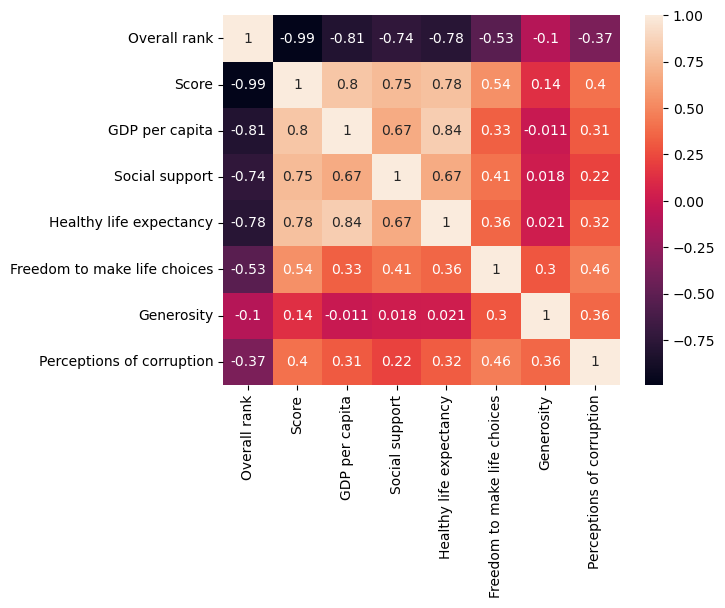

In [34]:
sns.heatmap(df_2018.corr(numeric_only=True), annot=True)

plt.show()

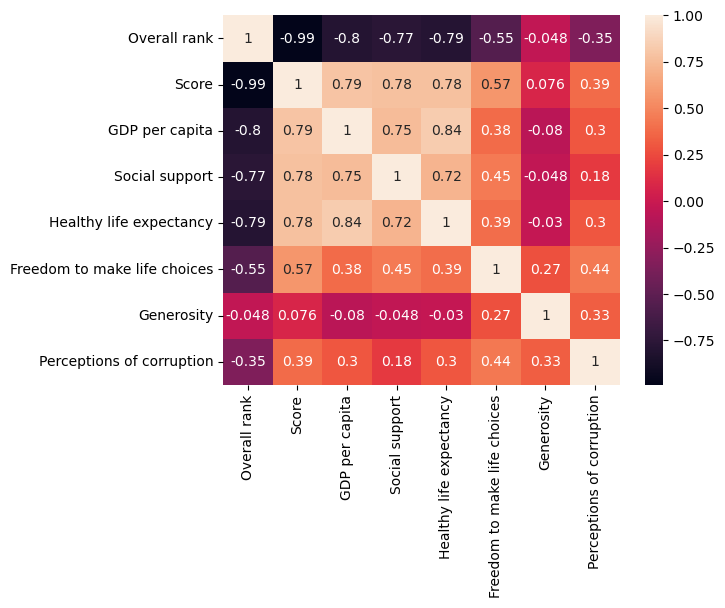

In [35]:
sns.heatmap(df_2019.corr(numeric_only=True), annot=True)
plt.show()

# Топ 10 стран с самым высоким уровнем счастья <a class="anchor" id="4-bullet"></a>

In [36]:
df_top10_2018 = df_2018.sort_values('Score', ascending=False).head(10)
df_top10_2019 = df_2019.sort_values('Score', ascending=False).head(10)

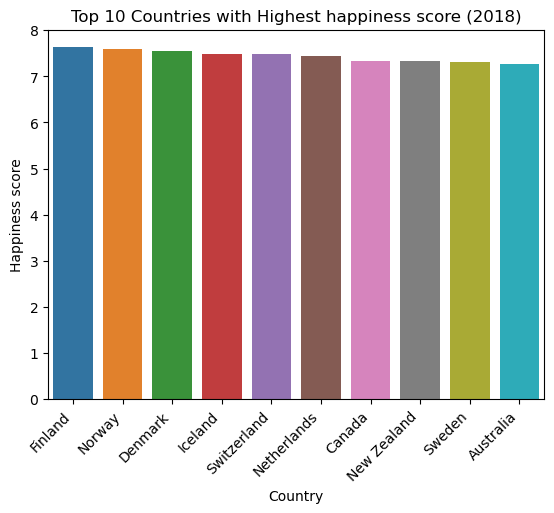

In [37]:
sns.barplot(data=df_top10_2018, x='Country or region', y='Score')

plt.title('Top 10 Countries with Highest happiness score (2018)')
plt.xlabel('Country')
plt.ylabel('Happiness score')

plt.xticks(rotation=45, ha='right')

plt.show()

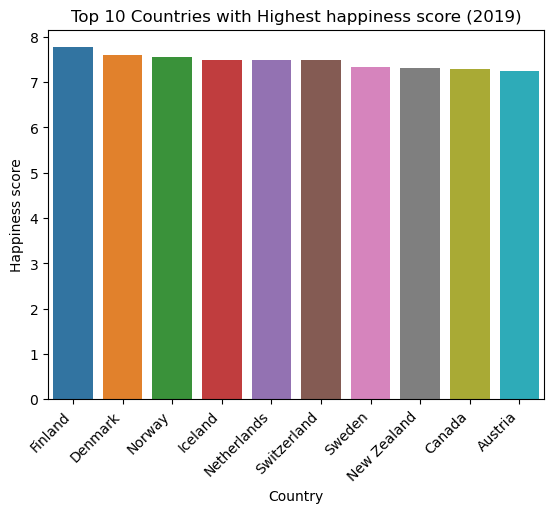

In [38]:
sns.barplot(data=df_top10_2019, x='Country or region', y='Score')

plt.title('Top 10 Countries with Highest happiness score (2019)')
plt.xlabel('Country')
plt.ylabel('Happiness score')

plt.xticks(rotation=45, ha='right')

plt.show()

# Факторы, которые больше всего влияют на уровень счастья в отдельных странах <a class="anchor" id="5-bullet"></a>

На данных графиках не показаны неизвестные факторы, не представленные в исходном датасете.

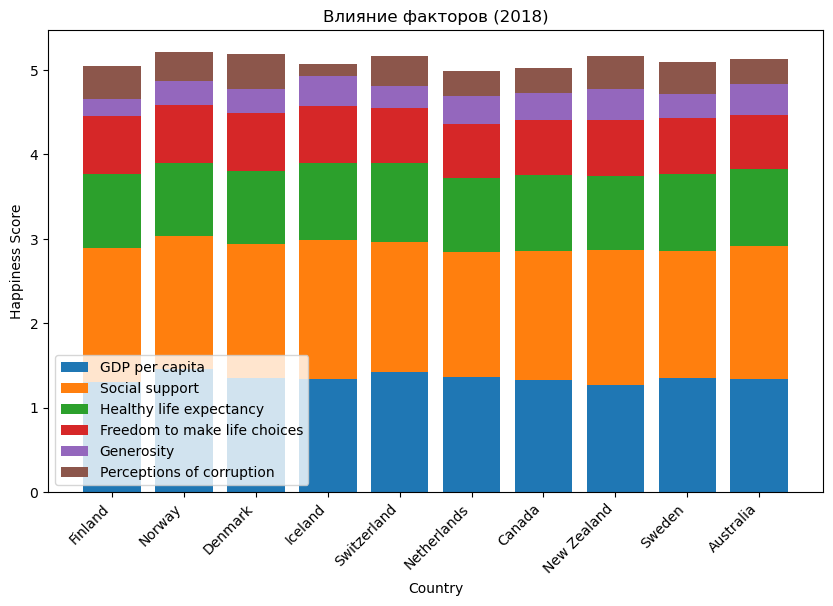

In [39]:
factors = df_top10_2018.iloc[:, 3:].columns
num_countries = len(df_top10_2018)
num_factors = len(factors)
factor_values = np.zeros((num_countries, num_factors))

for i, factor in enumerate(factors):
    factor_values[:, i] = df_top10_2018[factor]


plt.figure(figsize=(10, 6))
for i in range(num_factors):
    plt.bar(df_top10_2018['Country or region'], factor_values[:, i], label=factors[i], bottom=np.sum(factor_values[:, :i], axis=1))

plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Влияние факторов (2018)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

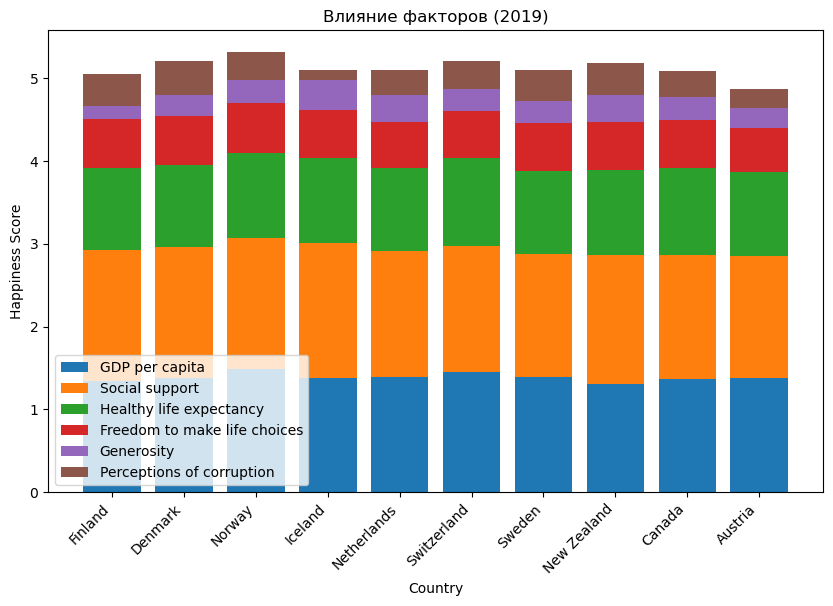

In [40]:
factors = df_top10_2019.iloc[:, 3:].columns
num_countries = len(df_top10_2019)
num_factors = len(factors)
factor_values = np.zeros((num_countries, num_factors))

for i, factor in enumerate(factors):
    factor_values[:, i] = df_top10_2019[factor]


plt.figure(figsize=(10, 6))
for i in range(num_factors):
    plt.bar(df_top10_2019['Country or region'], factor_values[:, i], label=factors[i], bottom=np.sum(factor_values[:, :i], axis=1))

plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Влияние факторов (2019)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

# Рассчитаем неизвестные факторы и объединим таблицы <a class="anchor" id="6-bullet"></a>

Уровень счастья в датасете представляет собой сумму различных факторов. Так как в датасете предоставлены не все факторы, я решил расчитать недостающие для большей наглядности и назвать их как unknown factors

In [41]:
df_concat = pd.concat([df_2018, df_2019], sort=False)
df_concat

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [42]:
df_concat['unknown factors'] = df_concat['Score'] - np.sum(df_concat.iloc[:, 3:], axis=1)
df_concat

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,unknown factors
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2.585
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2.383
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2.371
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2.426
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2.318
...,...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,0.467
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,0.531
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,1.792
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,2.457


# Построим уравнение линейной регрессии для предсказания уровня счастья <a class="anchor" id="7-bullet"></a>

In [43]:
import statsmodels.api as sms

df_concat.describe().T

,count,mean,std,min,25%,50%,75%,max
Overall rank,312.0,78.500000,45.104737,1.000,39.75000,78.5000,117.25000,156.000
Score,312.0,5.391506,1.114631,2.853,4.51425,5.3795,6.17600,7.769
GDP per capita,312.0,0.898298,0.394592,0.000,0.60950,0.9600,1.21950,2.096
Social support,312.0,1.211026,0.300310,0.000,1.05575,1.2655,1.45750,1.644
Healthy life expectancy,312.0,0.661295,0.252724,0.000,0.48825,0.6990,0.85800,1.141
Freedom to make life choices,312.0,0.423538,0.156024,0.000,0.32250,0.4495,0.54025,0.724
Generosity,312.0,0.182926,0.096739,0.000,0.10875,0.1755,0.24500,0.598
Perceptions of corruption,312.0,0.111301,0.095212,0.000,0.05000,0.0820,0.14025,0.457
unknown factors,312.0,1.903122,0.523321,0.184,1.56025,1.9090,2.27350,3.050


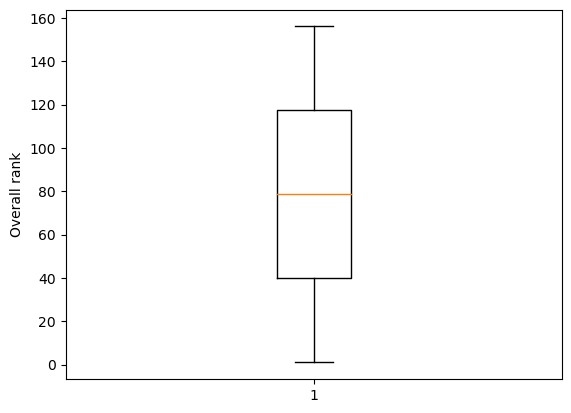

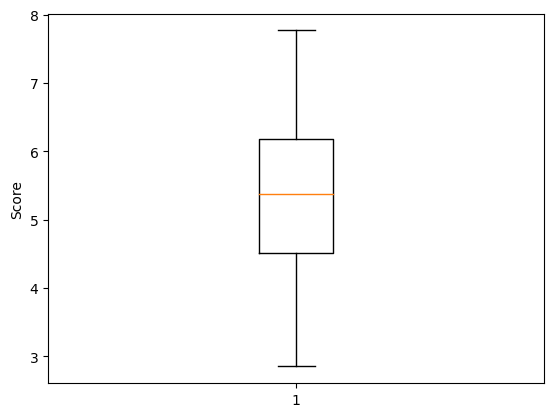

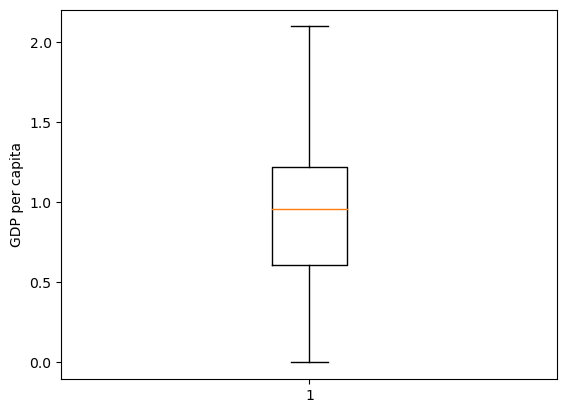

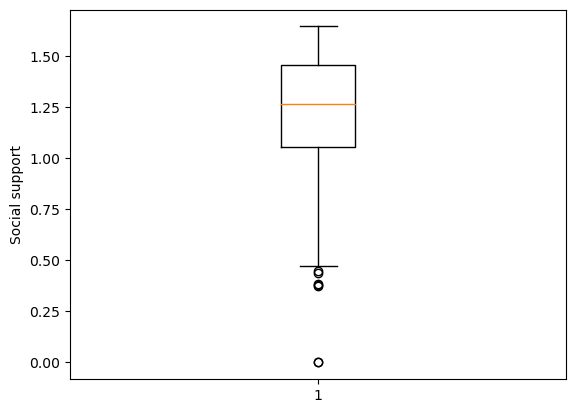

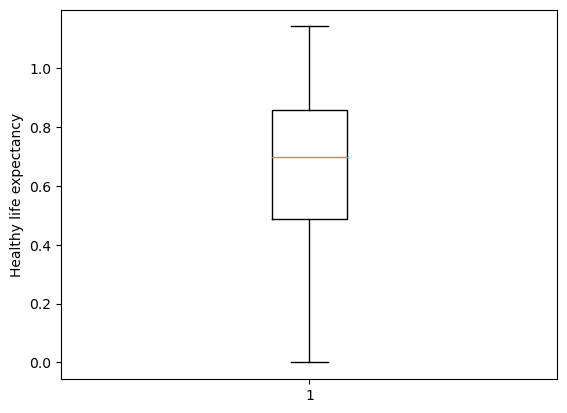

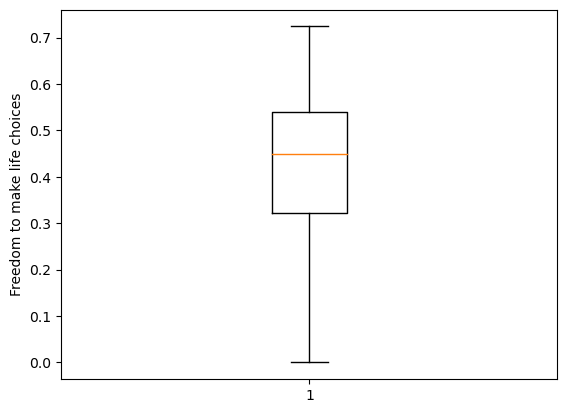

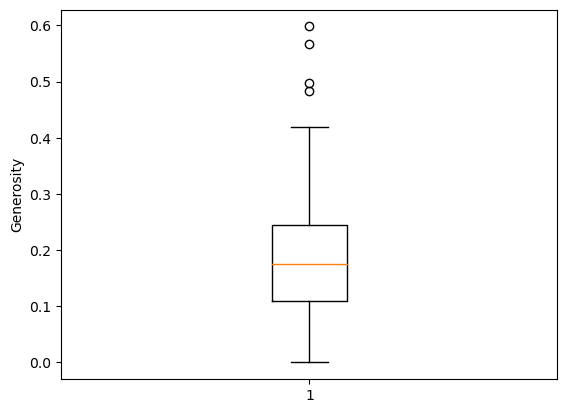

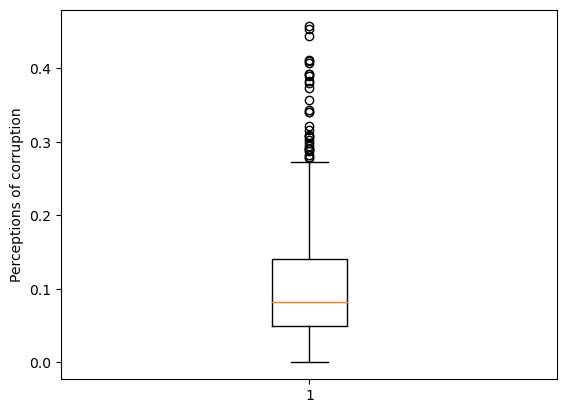

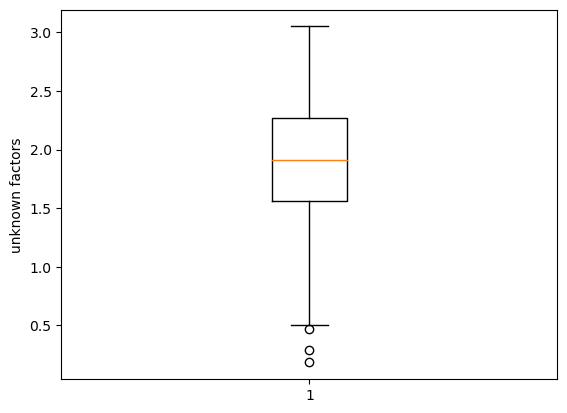

In [44]:
for col in df_concat.select_dtypes(include=['number']):
    plt.boxplot(df_concat[col])
    plt.ylabel(col)
    plt.show()

На графиках видно, что столбцы Social support и Perceptions of corruption имеют явные выбросы, поэтому избавимся от них

In [45]:
def replace_outliers(column):
    '''Функция заменяет выбросы на среднее значение по столбцу'''
    
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    column = column.apply(lambda x: column.mean() if x < lower_bound or x > upper_bound else x)
    
    return column

In [46]:
df_concat['Social support'] = replace_outliers(df_concat['Social support'])
df_concat['Perceptions of corruption'] = replace_outliers(df_concat['Perceptions of corruption'])

In [47]:
X = df_concat.iloc[:, 3:9]
y = df_concat['Score']
X = sms.add_constant(X)
64	
lm = sms.OLS(y,X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     180.8
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.67e-97
Time:                        12:08:46   Log-Likelihood:                -239.50
No. Observations:                 312   AIC:                             493.0
Df Residuals:                     305   BIC:                             519.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.6389      0.162     10.112      0.000       1.320       1.958
GDP per capita                   0.9871      0.144      6.857      0.000       0.704       1.270
Social support                   1.0983      0.164      6.698      0.000       0.776       1.421
Healthy life expectancy          1.0261      0.209      4.914      0.000       0.615       1.437
Freedom to make life choices     1.6551      0.226      7.333      0.000       1.211       2.099
Generosity                       0.5335      0.331      1.613      0.108      -0.117       1.184
Perceptions of corruption        0.4092      0.615      0.666      0.506      -0.800       1.619
==============================================================================
Omnibus:                        7.919   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.769
Skew:                          -0.370   Prob(JB):                       0.0206
Kurtosis:                       3.226   Cond. No.                         42.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Мы получили достаточно высокие значения R² и Adj. R², значит модель хорошо соответствует данным. В то же время у коэффициента Perceptions of corruption p-value > 0.05, значит коэффициент не является статистически значимым, и его вклад в модель незначителен.

In [48]:
print(f'y = {model.params["const"]:.2f} + {" + ".join(f"{value:.2f}*x_{i}" for i, value in enumerate(model.params[1:]))}')

y = 1.64 + 0.99*x_0 + 1.10*x_1 + 1.03*x_2 + 1.66*x_3 + 0.53*x_4 + 0.41*x_5


Чтобы убедиться в правильности модели, построим qq plot и посмотрим на нормальность распределения остатков.

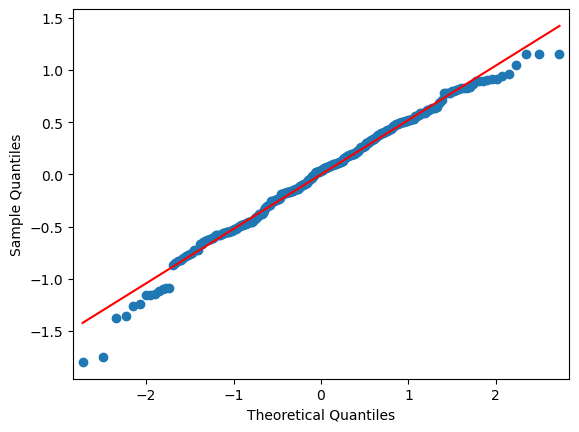

In [49]:
residuals = model.resid
sms.qqplot(residuals, line='s')
plt.show()

Остатки распределены близко к нормальному, поэтому всё в порядке.

# Посмотрим как менялся уровень счастья в России <a class="anchor" id="8-bullet"></a>

In [50]:
df_2015 = pd.read_csv('data-sets/2015.csv')
df_2016 = pd.read_csv('data-sets/2016.csv')
df_2017 = pd.read_csv('data-sets/2017.csv')
df_2018 = pd.read_csv('data-sets/2018.csv')
df_2019 = pd.read_csv('data-sets/2019.csv')

In [51]:
russia_2015 = df_2015[df_2015['Country'] == 'Russia'][['Happiness Rank', 'Happiness Score']]
russia_2016 = df_2016[df_2016['Country'] == 'Russia'][['Happiness Rank', 'Happiness Score']]
russia_2017 = df_2017[df_2017['Country'] == 'Russia'][['Happiness.Rank', 'Happiness.Score']]
russia_2018 = df_2018[df_2018['Country or region'] == 'Russia'][['Overall rank', 'Score']]
russia_2019 = df_2019[df_2019['Country or region'] == 'Russia'][['Overall rank', 'Score']]

df_rank = pd.concat([russia_2015['Happiness Rank'], russia_2016['Happiness Rank'], russia_2017['Happiness.Rank'], russia_2018['Overall rank'], russia_2019['Overall rank']]).to_frame()\
                                                                                     .rename(columns={0: 'Rank'})\
                                                                                     .reset_index(drop=True)
df_score = pd.concat([russia_2015['Happiness Score'], russia_2016['Happiness Score'], russia_2017['Happiness.Score'], russia_2018['Score'], russia_2019['Score']]).to_frame()\
                                                                                     .rename(columns={0: 'Score'})\
                                                                                     .reset_index(drop=True)

df_rank['Year'] = [2015, 2016, 2017, 2018, 2019]
df_score['Year'] = [2015, 2016, 2017, 2018, 2019]

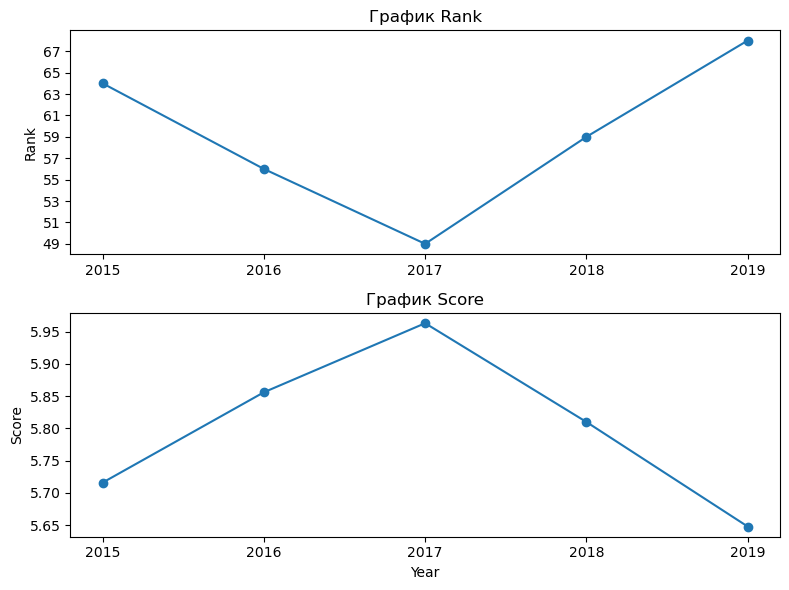

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(df_rank['Year'], df_rank['Rank'], marker='o', linestyle='-')
axes[0].set_xticks(df_rank['Year'])
axes[0].set_yticks(range(min(df_rank['Rank']), max(df_rank['Rank']) + 1, 2))
axes[0].set_ylabel('Rank')
axes[0].set_title('График Rank')

axes[1].plot(df_score['Year'], df_score['Score'], marker='o', linestyle='-')
axes[1].set_xticks(df_score['Year'])
axes[1].set_ylabel('Score')
axes[1].set_xlabel('Year')
axes[1].set_title('График Score')

plt.tight_layout()
plt.show()

По графикам видно, что с 2017 года Россия начала снижаться по уровню счастья

# Вывод <a class="anchor" id="9-bullet"></a>

Этот проект подчеркивает важность ВВП на душу населения, социальной поддержки и свободы выбора как ключевых факторов, влияющих на уровень счастья в странах.

Анализ динамики счастья в России свидетельствует о снижении уровня счастья после 2017 года. Это может быть интересной отправной точкой для дальнейшего исследования и анализа причин этой динамики.

Уравнение линейной регрессии может быть использовано для предсказания уровня счастья на основе известных факторов, что может быть полезно для разработки стратегий и политики по улучшению уровня счастья в разных странах.

В целом, этот проект предоставляет полезные выводы и инструменты для анализа уровня счастья и его динамики в разных странах.